# Tugas Akhir
# Chihago Crimes Dataset

##### Anggota Kelompok:
1. Aditya Arya Hendrady (null)
2. Arfi Renaldi (null)
3. Harry Akbar Ali Munir (1506689080)
4. Rifki Adrian (1506726946)

###### Kelas A
###### Faculty of Computer Science, University of Indonesia

## 1) Environment Preparation

### 1.a) Library installation

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## 2) Data Preparation

In [61]:
df = pd.read_csv("Crimes_-_2001_to_present.csv")

print("Jumlah row: {}".format(df.shape[0]))
print("Jumlah feature: {}".format(df.shape[1]))
df.head()

Jumlah row: 6582553
Jumlah feature: 22


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


### 2.a) Data Cleansing

#### Sampling

Sampling diperlukan karena terdapat jumlah baris yang sangat banyak (6582553 baris) sehingga akan menyebabkan proses komputasi yang besar. Data sample diambil sebanyak 30% sebanyak data populasi

In [14]:
import numpy as np
import random

df_sample = df.sample(frac=0.3)
print("Jumlah row: {}".format(df_sample.shape[0]))
print("Jumlah feature: {}".format(df_sample.shape[1]))
df_sample

Jumlah row: 197476
Jumlah feature: 22


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2769935,8029141,HT260262,04/21/2011 09:00:00 AM,065XX S HONORE ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,15.0,67.0,05,1165136.0,1861374.0,2011,02/10/2018 03:50:01 PM,41.775208,-87.670184,"(41.775208199, -87.670183656)"
2686760,7831046,HS630168,11/23/2010 08:55:00 PM,0000X N KILBOURN AVE,1525,PROSTITUTION,PATRONIZING A PROSTITUTE,STREET,True,False,...,28.0,26.0,16,1146385.0,1899845.0,2010,02/10/2018 03:50:01 PM,41.881154,-87.737946,"(41.881154318, -87.737945883)"
4428505,2974040,HJ641142,09/20/2003 12:35:00 AM,009XX N CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,37.0,25.0,16,1144192.0,1905636.0,2003,02/28/2018 03:56:25 PM,41.897087,-87.745853,"(41.897086966, -87.745852958)"
6446774,7078714,HR486615,08/15/2009 01:00:00 PM,016XX N BOSWORTH AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,1.0,24.0,05,1165739.0,1911026.0,2009,02/28/2018 03:56:25 PM,41.911445,-87.666560,"(41.911445354, -87.666560011)"
5725236,5588831,HN393920,06/09/2007 04:40:15 AM,021XX S HARDING AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,24.0,29.0,08B,1150386.0,1889452.0,2007,02/28/2018 03:56:25 PM,41.852558,-87.723525,"(41.852557609, -87.723525411)"
5901840,5950766,HN750491,12/09/2007 04:00:00 PM,068XX S HALSTED ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,6.0,68.0,06,1172145.0,1859597.0,2007,02/28/2018 03:56:25 PM,41.770181,-87.644542,"(41.770180713, -87.644541753)"
5896649,5937946,HN736503,12/01/2007 10:25:08 AM,012XX W HASTINGS ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,True,False,...,2.0,28.0,08B,1168175.0,1893869.0,2007,02/28/2018 03:56:25 PM,41.864313,-87.658107,"(41.864313014, -87.658106942)"
3109922,8839850,HV512390,10/10/2012 02:55:00 PM,013XX W GARFIELD BLVD,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,16.0,67.0,14,1168395.0,1868157.0,2012,02/10/2018 03:50:01 PM,41.793752,-87.658041,"(41.793751987, -87.658041276)"
1009667,3266004,HK228334,03/08/2004 10:00:00 PM,064XX S WHIPPLE ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,15.0,66.0,18,1157155.0,1861875.0,2004,02/10/2018 03:50:01 PM,41.776748,-87.699428,"(41.776748173, -87.699427651)"
4058347,2470840,HH801488,11/25/2002 07:15:00 AM,030XX N LINCOLN AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,32.0,6.0,05,1166071.0,1920379.0,2002,02/28/2018 03:56:25 PM,41.937103,-87.665073,"(41.937103437, -87.665072582)"


#### Mengecek Null Values

In [16]:
df_sample.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      110
Arrest                      0
Domestic                    0
Beat                        0
District                    2
Ward                    18388
Community Area          18423
FBI Code                    0
X Coordinate             3783
Y Coordinate             3783
Year                        0
Updated On                  0
Latitude                 3783
Longitude                3783
Location                 3783
dtype: int64

Dikarenakan adanya null values, sehingga kami perlu menghandle missing values.
Penanganan missing values ini dibagi menjadi 2 kategori yaitu pada data kategorikal dan data numerikal.
- Pada data numerikal, kami memutuskan untuk mengisi missing values dengan nilai median pada setiap fitur
- Pada data kategorikal, kami memutuskan untuk mengisi missing values dengan nilai modus pada setiap fitur

In [56]:
location_description_mode = df_sample["Location Description"].mode()
district_mean = df_sample["District"].mean()
ward_mean = df_sample["Ward"].mean()
community_area_mean = df_sample["Community Area"].mean()
x_coordinate_mean = df_sample["X Coordinate"].mean()
y_coordinate_mean = df_sample["Y Coordinate"].mean()
latitude_mean = df_sample["Latitude"].mean()
longitude_mean = df_sample["Longitude"].mean()

df_clean = df_sample.fillna(value={
    "Location Description": location_description_mode[0],
    "District" : district_mean,
    "Ward": ward_mean,
    "Community Area": community_area_mean,
    "X Coordinate": x_coordinate_mean,
    "Y Coordinate" : y_coordinate_mean,
    "Latitude" : latitude_mean,
    "Longitude" : longitude_mean,
    "Location" : "({},{})".format(latitude_mean, longitude_mean)
})

df_clean.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

####  Mengecek Outlier
Sebelum data digunakan lebih lanjut, kami perlu mengecek apakah ada outlier pada data.
Kami menggunakan box plot untuk melihat apakah ada outlier. Pada boxplot outlier ditandai dengan titik-titik hitam.

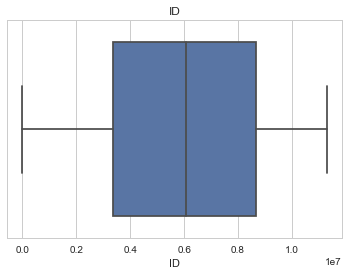

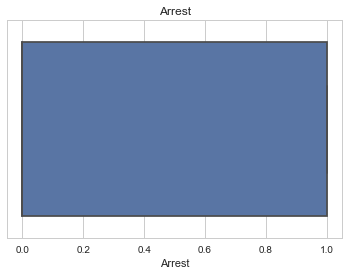

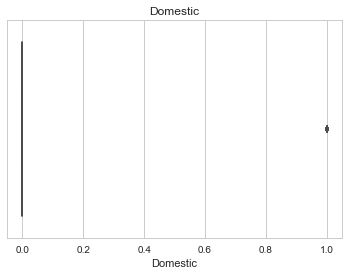

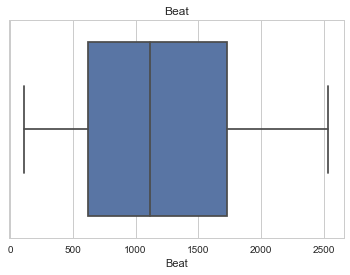

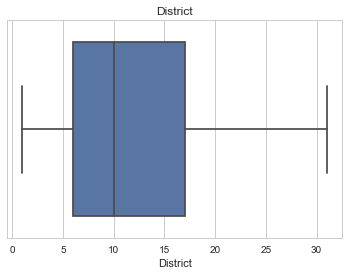

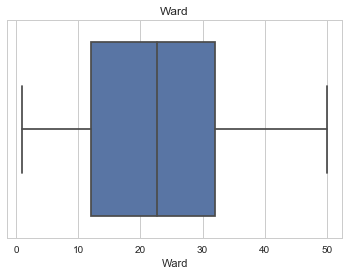

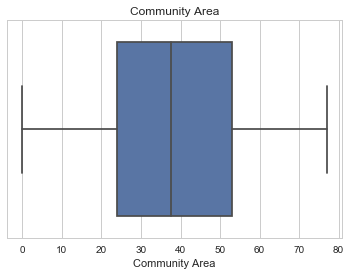

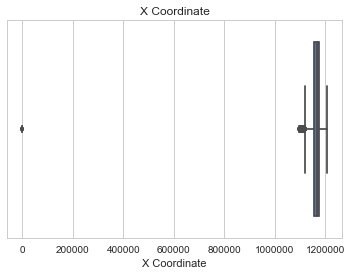

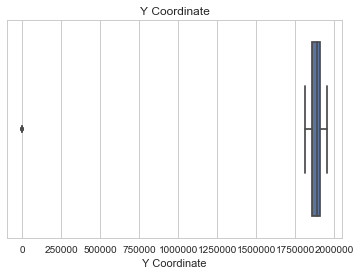

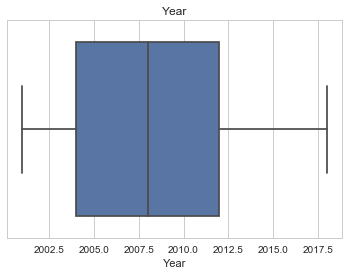

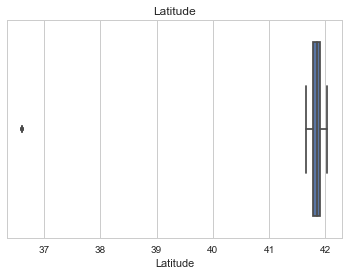

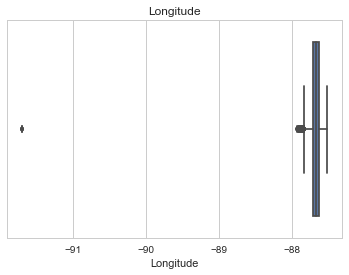

In [82]:
%matplotlib inline

def is_categorical(array_like):
    return array_like.dtype.name == 'object'

def box_plot(data, feature):
    if(not is_categorical(data)):
        sns.boxplot(data).set_title(feature)
        plt.show()

for i in df_clean:
    box_plot(df_clean[i], i)

Pada boxplot di atas terlihat bahwa ada beberapa feature yang memiliki outlier di dalamnya.
Diantaranya adalah:
- Domestic
- X Coordinate
- Y Coordinate
- Latitude
- Longitude

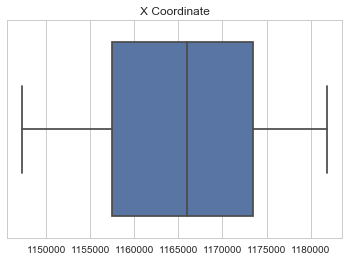

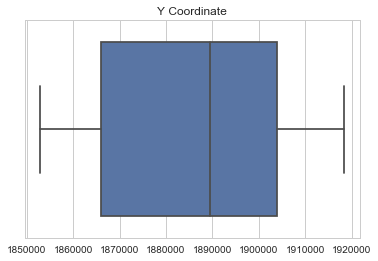

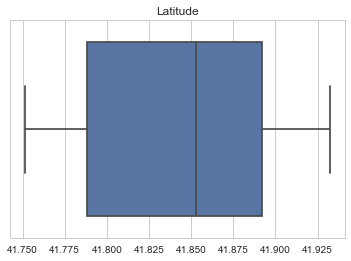

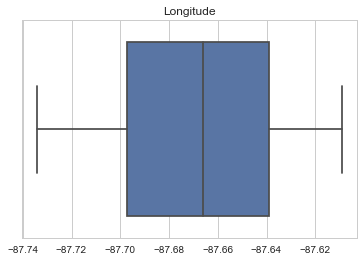

In [89]:
def remove_outlier(feature):
    arr = df_clean[feature]
    elements = np.array(arr)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    final_list = [x for x in arr if (x > mean - 1 * sd)]
    final_list = [x for x in final_list if (x < mean + 1 * sd)]

    #visualisasi
    sns.boxplot(final_list).set_title(feature)
    plt.show()

features_with_outlier = ["X Coordinate", "Y Coordinate", "Latitude", "Longitude"]
for feature in features_with_outlier:
    remove_outlier(feature)

Nah, sekarang data tersebut sudah tidak memiliki outlier. Jadi lebih cantik, bukan?

### 2.b) Feature Extraction

### 2.c) Data Analysis

## 3) Accuracy Testing

### 3.a) Test a few machine learning algorithm with your dataset